# Usage

**Authors:** Judith Korth and Hannu Parviainen </br>
**Edited:** 4 March 2025

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from clcsim import LCSim

## How to simulate a transit

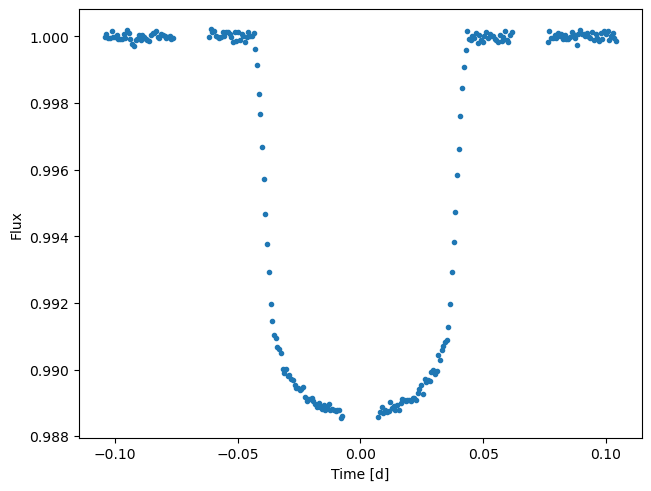

In [3]:
lcs = LCSim(window_width=5.0, exp_time=60, white_noise=1e-4)
time, flux = lcs(radius_ratio=0.1, zero_epoch=0.0, period=2.0,
                 scaled_semi_major_axis=8.0, impact_parameter=0.1)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(time, flux, '.')
plt.setp(ax, xlabel='Time [d]', ylabel='Flux');

## How to simulate a full phase curve

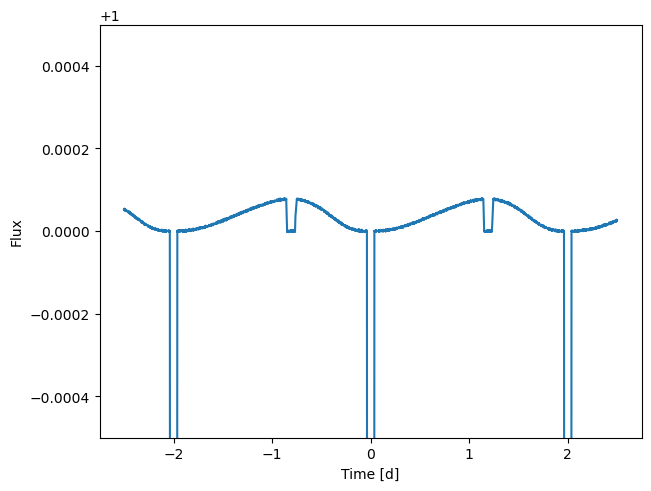

In [4]:
lcs = LCSim(window_width=24*5, exp_time=60, white_noise=1e-6)
time, flux = lcs(radius_ratio=0.1, zero_epoch=0.0, period=2.0,
                 scaled_semi_major_axis=8.0, impact_parameter=0.1,
                 eccentricity=0.2, argument_of_periastron=0.23*3.14,
                 geometric_albedo=0.5)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(time, flux, '-')
plt.setp(ax, ylim=(0.9995, 1.0005), xlabel='Time [d]', ylabel='Flux');

---
<center>&copy; 2025 Judith Korth and Hannu Parviainen </center>